# Netflix Data Analysis Project
This project analyzes Netflix titles dataset using Python, Pandas, and Seaborn.
We will explore trends in content type, genres, ratings, actors, directors, duration, and descriptions.


In [ ]:
import pandas as pd

# Load CSV from the 'data' folder
df = pd.read_csv("data/netflix_titles.csv")

# Display first 5 rows to check
df.head()


In [2]:
# Check number of rows and columns
print(df.shape)

# Check column names
print(df.columns)

# Check data types and missing values
df.info()


(8807, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [3]:
# Show first 5 rows
df.head()

# Number of rows and columns
df.shape

# Data types and missing values
df.info()

# Summary statistics (for numerical columns, if any)
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [4]:
# List all column names
df.columns

# Quick glance at unique values in key columns
print(df['type'].value_counts())      # Movies vs TV Shows
print(df['release_year'].value_counts().sort_index())  # Releases by year
print(df['rating'].value_counts())    # Ratings like PG, R, etc.


type
Movie      6131
TV Show    2676
Name: count, dtype: int64
release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


## Data Cleaning
- Removed null values in key columns
- Converted durations to numeric
- Filtered out "Unknown" entries

In [5]:
# Count missing values per column
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
# Count missing values in each column
missing_values = df.isnull().sum()
missing_values


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# Drop rows where 'type' or 'title' is missing (essential info)
df = df.dropna(subset=['type', 'title'])

# Fill missing 'director' or 'cast' with 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

# Fill missing 'country' with 'Unknown'
df['country'] = df['country'].fillna('Unknown')

# Fill missing 'date_added' with a placeholder
df['date_added'] = df['date_added'].fillna('Not Available')


In [8]:
# Check duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df = df.drop_duplicates()



Number of duplicate rows: 0


In [9]:
# Convert 'date_added' to datetime, errors='coerce' will convert invalid/missing dates to NaT
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Optional: Extract month and year for easier analysis
df['added_month'] = df['date_added'].dt.month
df['added_year'] = df['date_added'].dt.year


In [10]:
str_cols = ['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in']
for col in str_cols:
    df[col] = df[col].str.strip()


In [11]:
# Check missing values again
df.isnull().sum()

# Quick look at cleaned data
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,2021.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,2021.0


In [12]:
# Count missing values in each column
missing_values = df.isnull().sum()
missing_values


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           4
duration         3
listed_in        0
description      0
added_month     98
added_year      98
dtype: int64

In [13]:
# Fill missing date_added with placeholder 'Not Available'
df['date_added'] = df['date_added'].fillna('Not Available')

# If you want to keep added_month/year numeric for analysis:
df['added_month'] = pd.to_datetime(df['date_added'], errors='coerce').dt.month
df['added_year'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year


In [14]:
df['rating'] = df['rating'].fillna('Unknown')


In [15]:
df['duration'] = df['duration'].fillna('Unknown')


In [16]:
df.isnull().sum()


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
added_month     98
added_year      98
dtype: int64

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


## Exploratory Data Analysis
- Plots of top actors, directors
- Genre distribution
- Ratings distribution
- Duration trends


## Distribution of Content Type
This chart shows the number of Movies vs TV Shows on Netflix. 
It helps us understand what type of content is more common.


C:\Users\Latitude 7480\AppData\Local\Temp\ipykernel_21808\1132297016.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


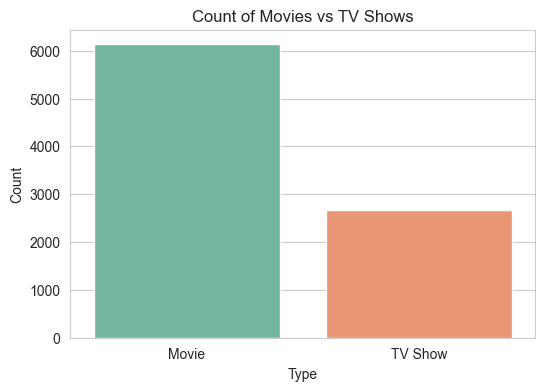

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Count of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


## Number of Titles Added Each Year
This line/bar chart shows how many Netflix titles were added each year, highlighting growth trends and changes in content production over time.


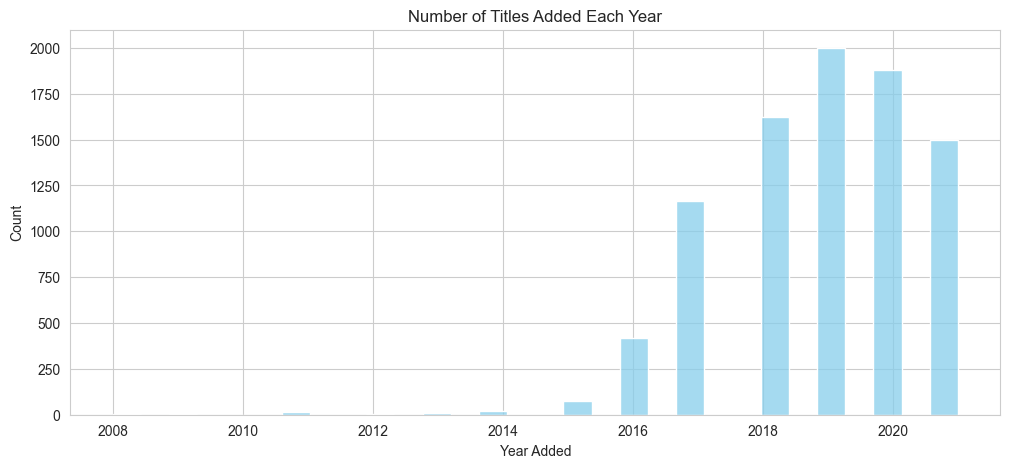

In [19]:
# Remove rows where added_year is NaN
df_year = df[df['added_year'].notnull()]

plt.figure(figsize=(12,5))
sns.histplot(df_year['added_year'], bins=30, kde=False, color='skyblue')
plt.title('Number of Titles Added Each Year')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()


## Top 10 Directors with Most Titles
This bar chart highlights the directors who have created the most content on Netflix.
We filtered out 'Unknown' to get meaningful results.


C:\Users\Latitude 7480\AppData\Local\Temp\ipykernel_21808\673228378.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Set1')


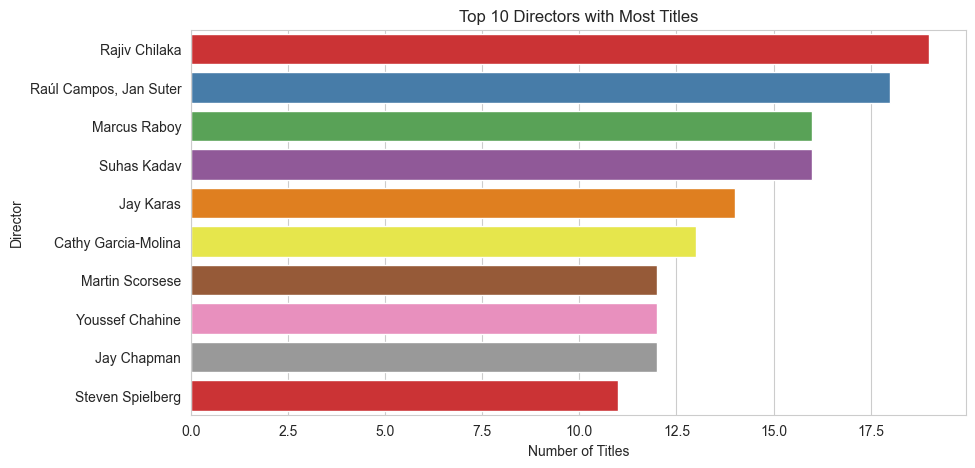

In [36]:
# Remove nulls and 'Unknown'
clean_directors = df['director'].dropna()
clean_directors = clean_directors[clean_directors != 'Unknown']

# Count top 10 directors
top_directors = clean_directors.value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Set1')
plt.title('Top 10 Directors with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


## Top 10 Actors with Most Titles
This bar chart shows actors appearing in the most Netflix titles.
We split the 'cast' column and counted each actor separately.


C:\Users\Latitude 7480\AppData\Local\Temp\ipykernel_21808\1494218637.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette='Set2')


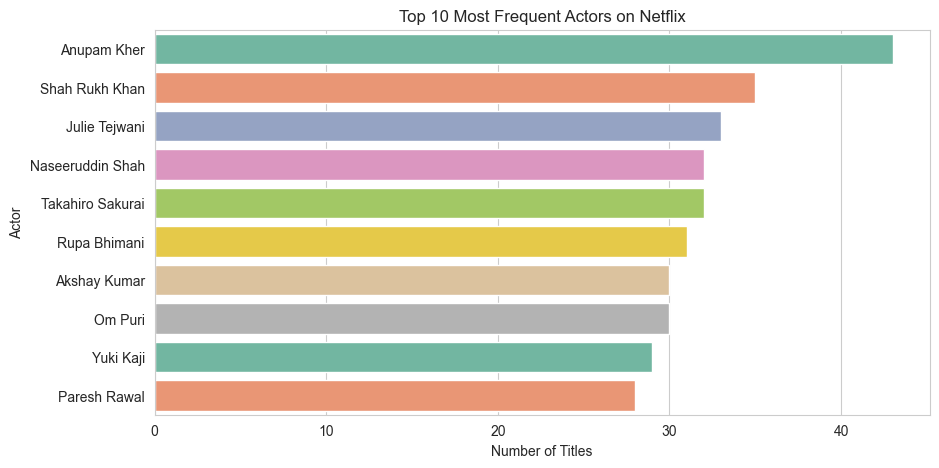

In [34]:
# Split cast into individual actors and remove null/unknown
df_actors = df['cast'].dropna()   # remove NaN
df_actors = df_actors[df_actors != 'Unknown']  # remove 'Unknown'
df_actors = df_actors.str.split(', ').explode()

# Top 10 actors by appearances
top_actors = df_actors.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='Set2')
plt.title('Top 10 Most Frequent Actors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.show()


## Top 10 Genres
This chart displays the most common genres in Netflix titles.
We split the 'listed_in' column to count each genre individually.


C:\Users\Latitude 7480\AppData\Local\Temp\ipykernel_21808\1772446463.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')


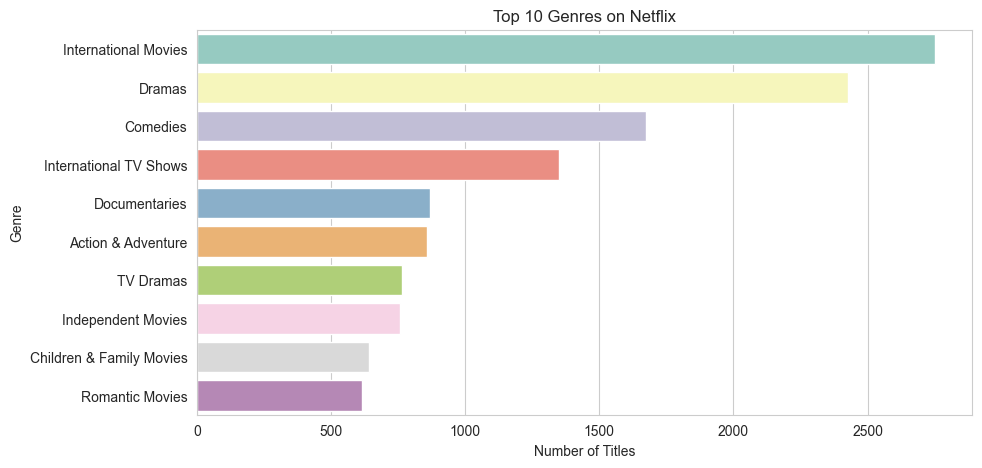

In [20]:
# 'listed_in' column contains genres separated by comma
genre_counts = df['listed_in'].str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


## Top 10 Most Productive Directors
This chart shows the directors with the most Netflix titles, excluding 'Unknown'. 
It highlights key contributors to Netflix content.


C:\Users\Latitude 7480\AppData\Local\Temp\ipykernel_21808\1921402384.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Set3')


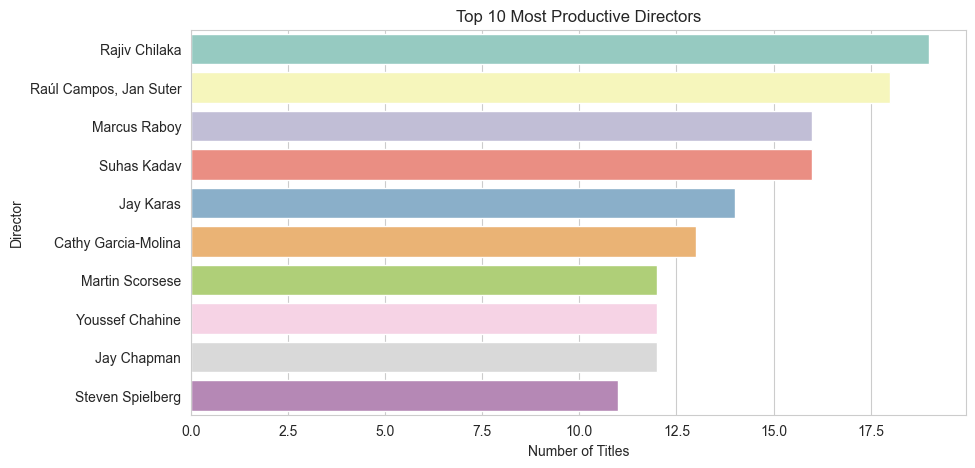

In [35]:
# Remove null/unknown directors
top_directors = df['director'].dropna()
top_directors = top_directors[top_directors != 'Unknown']
top_directors = top_directors.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Set3')
plt.title('Top 10 Most Productive Directors')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


## Distribution of Ratings
This chart shows how Netflix content is rated (e.g., PG, R, TV-MA).
It gives an idea of the target audience and content restrictions.


C:\Users\Latitude 7480\AppData\Local\Temp\ipykernel_21808\3532688665.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='Set2')


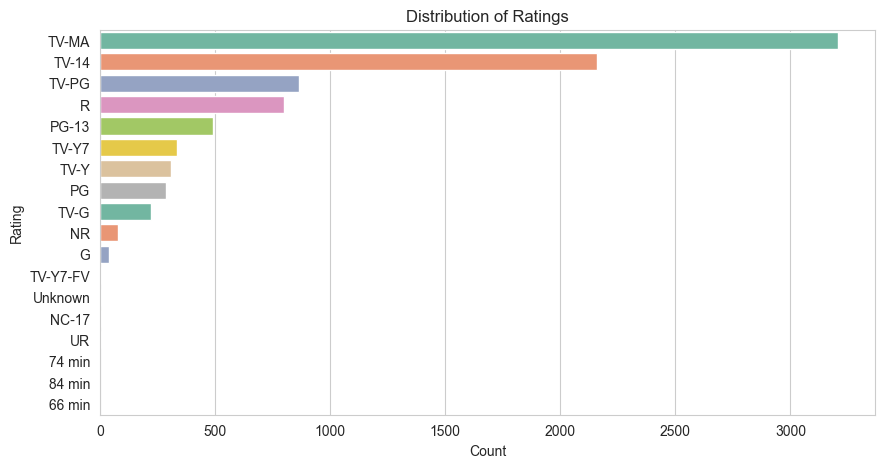

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='Set2')
plt.title('Distribution of Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


## Duration Distribution by Content Type
This boxplot shows the distribution of durations for Movies vs TV Shows.
It helps identify trends in content length (e.g., movies are longer than episodes).


C:\Users\Latitude 7480\AppData\Local\Temp\ipykernel_21808\2289586776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='duration_num', data=df, palette='Pastel1')


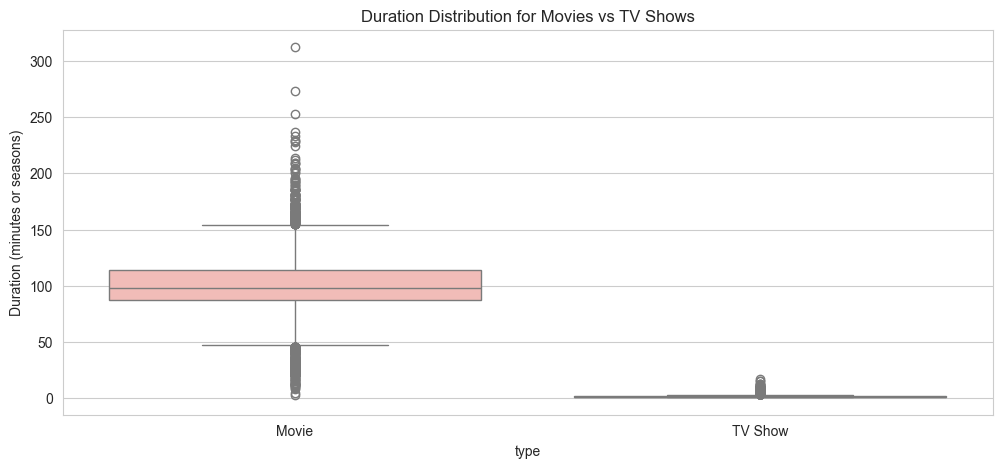

In [26]:
plt.figure(figsize=(12,5))
sns.boxplot(x='type', y='duration_num', data=df, palette='Pastel1')
plt.title('Duration Distribution for Movies vs TV Shows')
plt.ylabel('Duration (minutes or seasons)')
plt.show()


## Top 5 Genre Trends Over the Years

This line chart shows how the popularity of the **top 5 Netflix genres** has changed over time.  
- X-axis: Year of release or addition  
- Y-axis: Number of titles  
- Each line represents one of the top 5 genres  

**Key Observations to Look For:**  
- Identify which genres are **gaining popularity** over the years.  
- Identify genres that are **declining or stable**.  
- See if there are any **shifts in viewer preferences** or Netflix content strategy.  


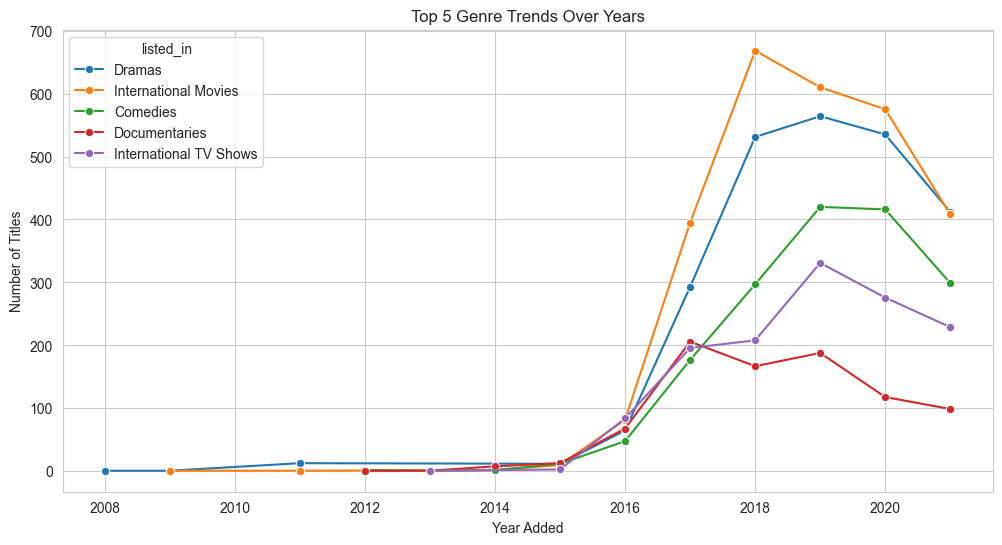

In [28]:
# Remove rows with missing added_year
df_genre_year = df[df['added_year'].notnull()]

# Split genres and explode
df_genre_year = df_genre_year.assign(listed_in=df_genre_year['listed_in'].str.split(', ')).explode('listed_in')

# Count titles per genre per year
genre_trend = df_genre_year.groupby(['added_year','listed_in']).size().reset_index(name='count')

# Plot top 5 genres over years
top_genres = df_genre_year['listed_in'].value_counts().head(5).index
plt.figure(figsize=(12,6))
sns.lineplot(data=genre_trend[genre_trend['listed_in'].isin(top_genres)],
             x='added_year', y='count', hue='listed_in', marker='o')
plt.title('Top 5 Genre Trends Over Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()


## Ratings Distribution by Content Type

This chart shows how Netflix content is rated across **Movies and TV Shows**.  
- X-axis: Content Rating (e.g., PG, TV-MA, R)  
- Y-axis: Number of Titles  
- Different colors represent **Movies vs TV Shows**  

**Key Observations:**  
- See which ratings are most common for Movies and TV Shows.  
- Understand Netflix’s target audience by content type.  
- Identify any differences in rating distribution between Movies and TV Shows.


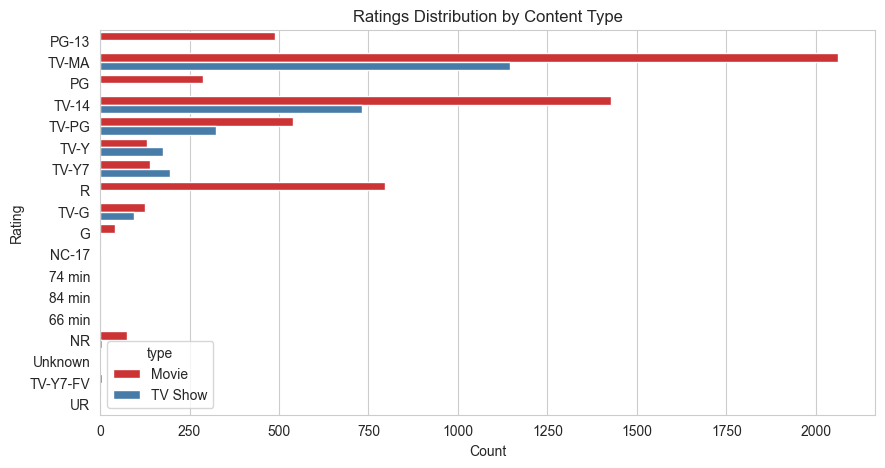

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(y='rating', hue='type', data=df, palette='Set1')
plt.title('Ratings Distribution by Content Type')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


In [32]:
!pip install wordcloud


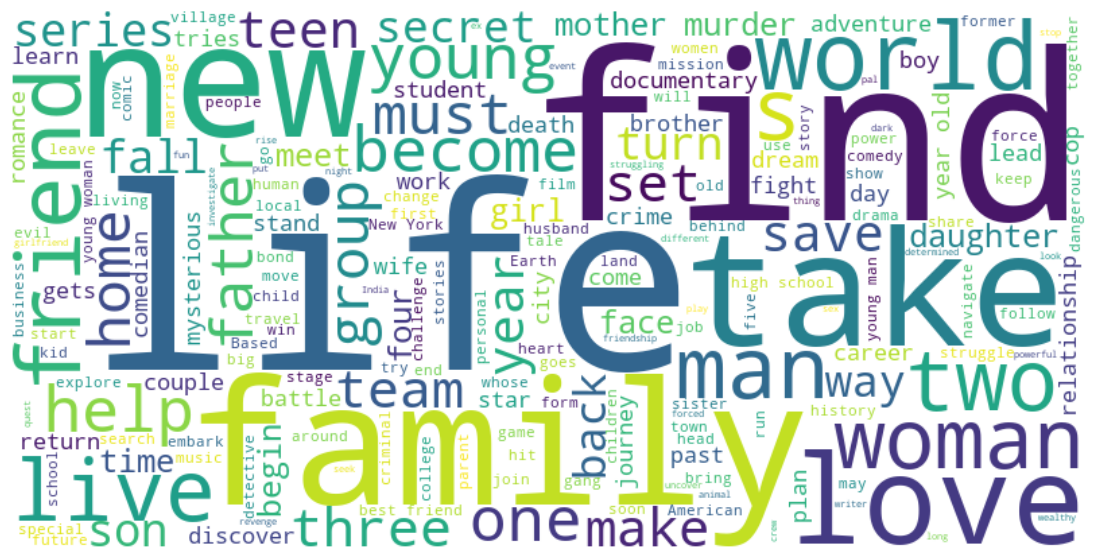

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
